In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as scio

In [2]:
data = scio.loadmat('ex8data1.mat')
X = data['X']
Xval = data['Xval']
yval = data['yval'].flatten()

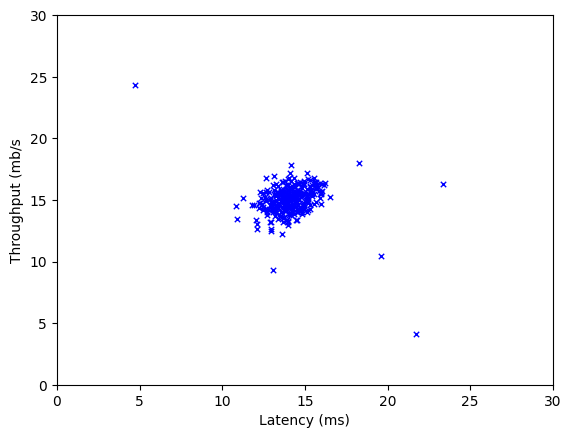

In [3]:
# Visualize the example dataset
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c='b', marker='x', s=15, linewidth=1)
plt.axis([0, 30, 0, 30])
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s')
plt.show()

In [4]:
def estimate_gaussian(X):
    # Useful variables
    m, n = X.shape

    # You should return these values correctly
    mu = np.zeros(n)
    sigma2 = np.zeros(n)

    mu=np.mean(X,axis=0)
    sigma2=np.std(X,axis=0)**2

    return mu, sigma2

In [5]:
def multivariate_gaussian(X, mu, sigma2):
    k = mu.size
    if sigma2.ndim == 1 or (sigma2.ndim == 2 and (sigma2.shape[1] == 1 or sigma2.shape[0] == 1)):
        sigma2 = np.diag(sigma2)

    x = X - mu
    p = (2 * np.pi) ** (-k / 2) * np.linalg.det(sigma2) ** (-0.5) * np.exp(-0.5*np.sum(np.dot(x, np.linalg.pinv(sigma2)) * x, axis=1))

    return p

In [6]:
def visualize_fit(X, mu, sigma2):
    grid = np.arange(0, 35.5, 0.5)
    x1, x2 = np.meshgrid(grid, grid)

    Z = multivariate_gaussian(np.c_[x1.flatten('F'), x2.flatten('F')], mu, sigma2)
    Z = Z.reshape(x1.shape, order='F')

    plt.figure()
    plt.scatter(X[:, 0], X[:, 1], marker='x', c='b', s=15, linewidth=1)

    # Do not plot if there are infinities
    if np.sum(np.isinf(X)) == 0:
        lvls = 10 ** np.arange(-20, 0, 3).astype(float)
        plt.contour(x1, x2, Z, levels=lvls, colors='r', linewidths=0.7)


In [7]:
# ===================== Part 2: Estimate the dataset statistics =====================
mu, sigma2 = estimate_gaussian(X)

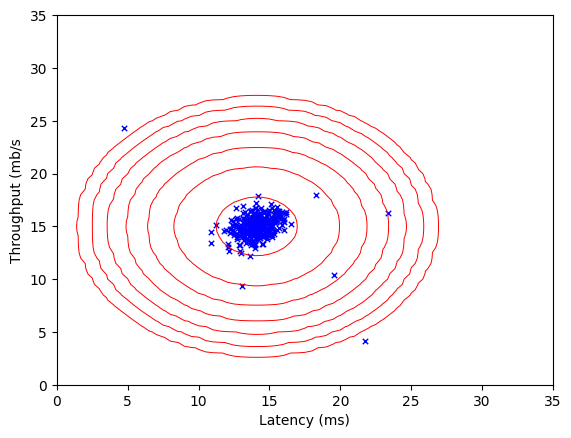

In [8]:
# Visualize the fit
visualize_fit(X, mu, sigma2)
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s')
plt.show()

In [64]:
def select_threshold(yval, pval):
    
    f1 = 0

    # You have to return these values correctly
    best_eps = 0
    best_f1 = 0
    
    for epsilon in np.linspace(np.min(pval), np.max(pval), num=1001):
        
        
        
        p=np.where(pval<epsilon)
        n=np.where(pval>epsilon)
        tp = np.sum(yval[p]==1)
        fp=np.sum(yval[p]==0)
        fn = np.sum(yval[n]==1)
        prec=(tp)/(tp+fp)
        rec=(tp)/(tp+fn)
        f1=(2*prec*rec)/(prec+rec)
        
        if f1 > best_f1:
            best_f1 = f1
            best_eps = epsilon
    return best_eps, best_f1   
        


In [69]:
# ===================== Part 3: Find Outliers =====================
p = multivariate_gaussian(X, mu, sigma2)
pval = multivariate_gaussian(Xval, mu, sigma2)

In [70]:
epsilon , f1 = select_threshold(yval, pval)

C:\Users\Elmostafa\AppData\Local\Temp\ipykernel_8020\3826101300.py:18: RuntimeWarning: invalid value encountered in scalar divide
  prec=(tp)/(tp+fp)


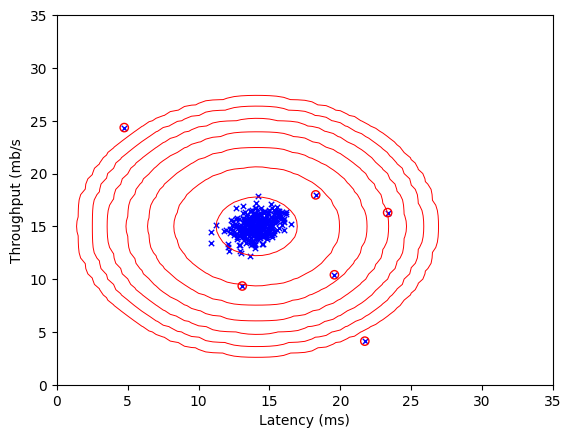

In [73]:
# Find outliers in the training set and plot
outliers = np.where(p < epsilon)
visualize_fit(X, mu, sigma2)
plt.scatter(X[outliers, 0], X[outliers, 1], marker='o', facecolors='none', edgecolors='r')
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s')
plt.show()

In [74]:
# ===================== Part 4: Multidimensional Outliers =====================
# Loads the second dataset.
data = scio.loadmat('ex8data2.mat')
X = data['X']
Xval = data['Xval']
yval = data['yval'].flatten()

# Apply the same steps to the larger dataset
mu, sigma2 = estimate_gaussian(X)

# Training set
p = multivariate_gaussian(X, mu, sigma2)

# Cross Validation set
pval = multivariate_gaussian(Xval, mu, sigma2)

# Find the best threshold
epsilon, f1 = select_threshold(yval, pval)

C:\Users\Elmostafa\AppData\Local\Temp\ipykernel_8020\3826101300.py:18: RuntimeWarning: invalid value encountered in scalar divide
  prec=(tp)/(tp+fp)
